**Mineração de Dados**


*   Aluno:
  * Pedro Alves Gonçalves Júnior - 383876

*   Problema:
  * Classificação. Determinar se o passageiro do titanic sobreviveu ou não, usando o classificado Árvore de Decisão


In [1]:
# Comando para acessar o dataset no drive

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [55]:
# Importando as bibliotecas

import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image  

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
# Lendo os dados dos drive

data = pd.read_csv('/content/drive/My Drive/Computer science/8st/Data Mining/Atv3 - Árvores de Decisão/data/train.csv')

In [17]:
# Fazendo uma pré-análise dos 5 primeiros elementos do dataset

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
# Removendo algumas features com menos importância

data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [19]:
# Verificando dados nulos

data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [20]:
# Verificando o tipo das colunas

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [21]:
# Verificando as quantidades de dados linha x coluna

data.shape

(891, 8)

In [23]:
# Contando as quantidades para cada elemento da coluna Embarked

data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [0]:
# Usar o SimpleImputer para preencher dados faltantes
# Usando a média para os dados numéricos e
# Usando a moda para os dados categóricos

age_imp = SimpleImputer(strategy='mean')
emb_imp = SimpleImputer(strategy='most_frequent')

In [0]:
# Aplicando as transformações no dataset

data[['Age']] = age_imp.fit_transform(data[['Age']])
data[['Embarked']] = emb_imp.fit_transform(data[['Embarked']])

In [26]:
# Verificando se ainda existe dados faltantes

data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [0]:
# Criando uma nova coluna para cada elemento categórico da coluna original
# Usar o drop_first para remover a primeira coluna criada

data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

In [0]:
# Separando os dados da label

X = data.iloc[:, 1:]
y = data.iloc[:, 1]

In [0]:
# Criando 10 novas dobras (fold)

fold = KFold(n_splits=10, shuffle=True, random_state=42)

In [41]:
# Pegando os índices das 10 dobras criadas

for idx_train, idx_val in fold.split(X, y):
  print(idx_train.shape, idx_val.shape)

(801,) (90,)
(802,) (89,)
(802,) (89,)
(802,) (89,)
(802,) (89,)
(802,) (89,)
(802,) (89,)
(802,) (89,)
(802,) (89,)
(802,) (89,)


In [0]:
# Criando um modelo de Árvore de Decisão com profundidade 1, pois com profundidade maior que 1, o nível de acerto foi 100%

model = DecisionTreeClassifier(max_depth=1, random_state=42)

In [61]:
# Calculando a Accuracy usando a validação cruzada, passando como parâmetro
# o modelo, os dados, a label, a quantidade de dobras feitas e a métrica de acerto

accuracy = cross_val_score(model, X, y, cv=fold, scoring='accuracy')
print(accuracy)

[0.83333333 0.79775281 0.78651685 0.75280899 0.75280899 0.80898876
 0.78651685 0.79775281 0.86516854 0.75280899]


In [62]:
# Obtendo a média das accuracys calculadas

np.mean(accuracy)

0.7934456928838951

In [65]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

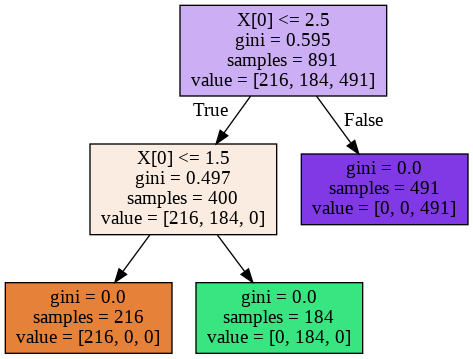

In [67]:
# Plotando um gráfico referente a Árvore de Decisão criada com os dados

dot_data = StringIO()
export_graphviz(model, out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())